In [4]:
import numpy as np
import matplotlib.pyplot as plt

from utilities import (image_preprocess, of_cg)


## TMA4205 - Estimation of Optical Flow
##### Julie Rose Godal og Tor Løvold Haugen
----

Innledning

Oppgave 1

Oppgave 2 intro

In [5]:
frame0_path = "test_images/frame10.png"
frame1_path = "test_images/frame11.png"

lam = 0.2
tol = 1e-8
maxit = 20000
sigma = 1.0
step = 12
scale = 80

u0, v0, Ix, Iy, rhsu, rhsv, I0, I1 = image_preprocess(frame0_path, frame1_path, sigma)

u, v, it, rel = of_cg(u0, v0, Ix, Iy, lam, rhsu, rhsv, tol=tol, maxit=maxit)
print(f"Done: iterations={it}, final rel_res^2={rel:.3e}")

Done: iterations=870, final rel_res^2=9.919e-09


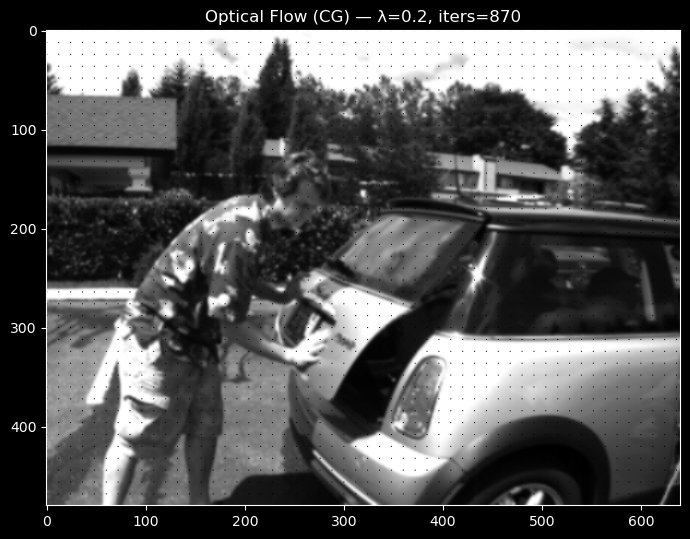

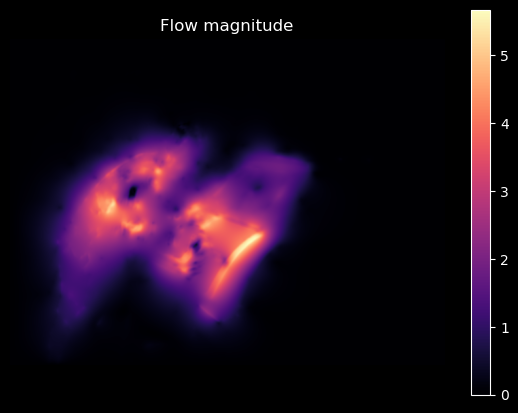

In [6]:
Y, X = np.mgrid[0:u.shape[0]:step, 0:u.shape[1]:step]

plt.figure(figsize=(7, 7))
plt.imshow(I0, cmap="gray", origin="lower")
plt.quiver(X, Y, u[::step, ::step], v[::step, ::step],
           angles="xy", scale_units="xy", scale=80, width=0.002)  # add a scale (e.g., 60–120)
plt.gca().invert_yaxis()
plt.title(f"Optical Flow (CG) — λ={lam}, iters={it}")
plt.tight_layout()
plt.show()

mag = np.hypot(u, v)
plt.figure(figsize=(7,5))
plt.imshow(mag, cmap="magma")
plt.colorbar()
plt.title("Flow magnitude")
plt.axis("off")
plt.show()
